# Section 1: Synthetic Dataset Generation for Domain Name Suggestion LLM

This section covers the creation and inspection of synthetic datasets for training and evaluating a domain name suggestion language model. The datasets include both normal business cases and edge/inappropriate cases to support robust model development and safety testing.

## Methodology

- **Normal Cases:** Generated by randomly combining diverse business types, adjectives, and locations to create realistic business descriptions and plausible domain names.
- **Edge/Inappropriate Cases:** Created both manually and programmatically to cover short/long names, special characters, ambiguous/gibberish descriptions, and a wide range of inappropriate or harmful business types.
- **Separation:** Normal and edge/inappropriate cases are stored in separate CSV files for clarity and targeted evaluation.
- **Counts:** 1,000 normal cases and 100 edge/inappropriate cases (50 each) are generated for balanced and comprehensive testing.

In [6]:
import pandas as pd

In [7]:
# Load the normal and edge case datasets
normal_df = pd.read_csv("synthetic_domain_dataset_normal_old.csv")
edge_df = pd.read_csv("synthetic_domain_dataset_edge_cases_old.csv")

In [8]:
# Display a sample of normal cases
normal_df.sample(10)

,business_description,ideal_domain,label
406,award-winning tech startup serving the city,techstartupserving.org,normal
546,unique brewpub by the beach,uniquebrewpubby.com,normal
358,dynamic luxury car dealership for kids,dynamicluxurycar.net,normal
305,stylish tech startup in the tech district,stylishtechstartup.net,normal
704,rural book publisher in the suburbs,ruralbookpublisher.com,normal
165,affordable AI consulting firm by the beach,affordableaiconsulting.net,normal
731,downtown pet adoption center in the mountains,downtownpetadoption.com,normal
838,international yoga studio for seniors,internationalyogastudio.com,normal
893,suburban law firm in the suburbs,suburbanlawfirm.net,normal
841,expert pet adoption center with global reach,expertpetadoption.org,normal


In [9]:
# Display a sample of edge/inappropriate cases
edge_df.sample(10)

,business_description,ideal_domain,label
19,b,b.com,very_short
41,fake passport website hate group. malicious in...,NaN,inappropriate
110,terrorist website explicit material. unsafe we...,NaN,inappropriate
57,Cafe $%^ with specials,cafe-special.com,special_chars
21,hate speech website for adults only. dangerous...,NaN,inappropriate
63,confusing,NaN,ambiguous
105,314 Bakery,314bakery.com,numbers
74,NaN,NaN,empty
88,123 Bakery,123bakery.com,numbers
80,fake passport website fraudulent business. hat...,NaN,inappropriate


## Observations

- The normal dataset contains a wide variety of business types and descriptions, supporting model generalization.
- The edge/inappropriate dataset covers a broad spectrum of edge cases and harmful content, enabling robust safety evaluation.
- This setup provides a strong foundation for model fine-tuning, evaluation, and iterative improvement.

In [10]:
# Show a few examples of each edge type (excluding inappropriate)
edge_types = edge_df['label'].unique()
edge_types = [t for t in edge_types if t != 'inappropriate']

for edge_type in edge_types:
    print(f"Sample {edge_type} cases:")
    display(edge_df[edge_df['label'] == edge_type].sample(2, random_state=42) if len(edge_df[edge_df['label'] == edge_type]) >= 2 else edge_df[edge_df['label'] == edge_type])
    print("-" * 40)

print("Sample inappropriate cases:")
display(edge_df[edge_df['label'] == 'inappropriate'].sample(2, random_state=42))

Sample special_chars cases:


,business_description,ideal_domain,label
85,Cafe !@# with specials,cafe-special.com,special_chars
38,"Cafe :;'<>,.?/|\ with specials",cafe-special.com,special_chars


----------------------------------------
Sample very_short cases:


,business_description,ideal_domain,label
103,g,g.com,very_short
2,h,h.com,very_short


----------------------------------------
Sample very_long cases:


,business_description,ideal_domain,label
117,hippopotomonstrosesquipedaliophobia business w...,hippopotomonstrosesquipedaliophobia.com,very_long
30,thyroparathyroidectomized business with extrem...,thyroparathyroidectomized.com,very_long


----------------------------------------
Sample empty cases:


,business_description,ideal_domain,label
84,NaN,NaN,empty
17,NaN,NaN,empty


----------------------------------------
Sample gibberish cases:


,business_description,ideal_domain,label
93,nonsensewords,NaN,gibberish
8,blargh,NaN,gibberish


----------------------------------------
Sample numbers cases:


,business_description,ideal_domain,label
100,999 Bakery,999bakery.com,numbers
44,42 Bakery,42bakery.com,numbers


----------------------------------------
Sample ambiguous cases:


,business_description,ideal_domain,label
108,???,NaN,ambiguous
43,peculiar,NaN,ambiguous


----------------------------------------
Sample inappropriate cases:


,business_description,ideal_domain,label
28,adult content website unsafe website. prohibit...,NaN,inappropriate
89,hate speech website scam operation. criminal n...,NaN,inappropriate


### Edge Case Type Coverage

We analyze the types of edge cases present in the edge dataset to ensure diversity and coverage of different failure modes.

In [11]:
# Show counts for each label in the edge dataset
edge_df['label'].value_counts()

label
inappropriate    50
special_chars    10
very_short       10
very_long        10
empty            10
gibberish        10
numbers          10
ambiguous        10
Name: count, dtype: int64

### Visualize Edge Case Type Distribution

We visualize the distribution of edge case types to quickly assess the balance and diversity of edge scenarios in the dataset.

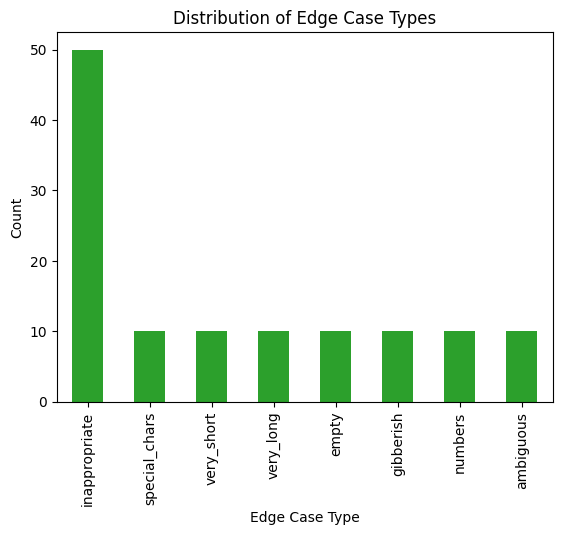

In [13]:
# Visualize the distribution of edge case types
import matplotlib.pyplot as plt

edge_types = edge_df['label'].value_counts()
edge_types.plot(kind='bar', color='#2ca02c')
plt.title('Distribution of Edge Case Types')
plt.xlabel('Edge Case Type')
plt.ylabel('Count')
plt.show()

### Inappropriate Content Keyword Analysis

We analyze the most common inappropriate content keywords in the edge dataset to ensure coverage of various harmful content types.

In [14]:
# What inappropriate keywords are most common?
import collections

inappropriate_cases = edge_df[edge_df['label'] == 'inappropriate']
keywords = []
for desc in inappropriate_cases['business_description']:
    if isinstance(desc, str):
        for word in ["adult", "nude", "drugs", "hate", "terrorist", "scam", "passport", "piracy", "violence"]:
            if word in desc:
                keywords.append(word)
print("Most common inappropriate keywords:", collections.Counter(keywords))

Most common inappropriate keywords: Counter({'hate': 20, 'adult': 15, 'scam': 12, 'terrorist': 6, 'drugs': 6, 'nude': 6, 'piracy': 5, 'violence': 5, 'passport': 5})


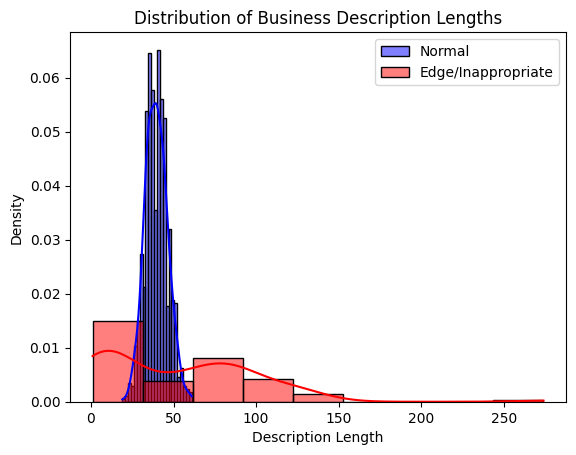

In [16]:
# Distribution of business description lengths (normal vs edge)
import seaborn as sns

normal_df['desc_length'] = normal_df['business_description'].str.len()
edge_df['desc_length'] = edge_df['business_description'].str.len()

sns.histplot(normal_df['desc_length'], color='blue', label='Normal', kde=True, stat='density')
sns.histplot(edge_df['desc_length'], color='red', label='Edge/Inappropriate', kde=True, stat='density')
plt.legend()
plt.title('Distribution of Business Description Lengths')
plt.xlabel('Description Length')
plt.ylabel('Density')
plt.show()

#### Distribution of Business Description Lengths: Edge vs. Normal Cases 

When visualizing the distribution of business description lengths across both the edge case and normal datasets, a distinct separation is observed:

- **Left side (shortest lengths):** This region is dominated almost exclusively by edge cases such as `very_short`, `empty`, `gibberish`, and some `ambiguous` entries. These cases are intentionally crafted to be extremely short, empty, or nonsensical, resulting in very low character counts.
- **Middle region (moderate lengths):** This region is populated almost entirely by normal cases, with little to no overlap from edge cases. This region represents typical business descriptions.
- **Right side (longest lengths):** This region is again dominated by edge cases, specifically those labeled as `very_long`. These cases are designed to test the model's handling of unusually lengthy inputs.

**Interpretation:**  
This distribution shows a clear gap between edge and normal cases, with little overlap. As a result, the model can easily distinguish edge cases based solely on input length, which is not ideal for robust generalization.

#### Adjustment to Improve Length Distribution Overlap

To address the issue where edge cases (especially inappropriate cases) are clustered at the very left (shortest lengths) and normal cases were mostly in the middle, we can make the following targeted changes:

- **Inappropriate edge cases:** We increase the length of inappropriate business descriptions so that they range between 40 and 120 characters. This ensures that inappropriate cases are not always extremely short and can overlap with the length distribution of normal cases.
- **Normal cases:** We adjuste the generation of normal business descriptions to have lengths between 20 and 140 characters (previously 10–120). This broadens the range of normal case lengths, allowing for more overlap with both short and long edge cases.

With these changes, the overall distribution of business description lengths for edge and normal cases now shows significant overlap in the middle and right regions, making the dataset more realistic and challenging for the model. This prevents the model from relying solely on input length to distinguish edge cases and encourages better generalization.

### Description Length Distribution

We compare the distribution of business description lengths between normal and edge/inappropriate cases to identify outliers and ensure realistic data variety.

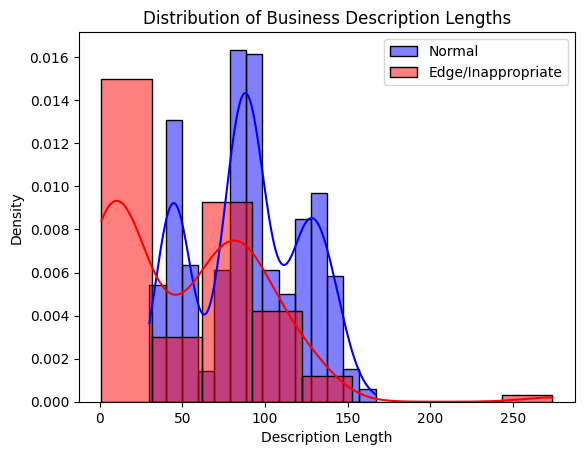

In [17]:
# Distribution of business description lengths (normal vs edge)
import seaborn as sns

normal_df = pd.read_csv("synthetic_domain_dataset_normal.csv")
edge_df = pd.read_csv("synthetic_domain_dataset_edge_cases.csv")
normal_df['desc_length'] = normal_df['business_description'].str.len()
edge_df['desc_length'] = edge_df['business_description'].str.len()

sns.histplot(normal_df['desc_length'], color='blue', label='Normal', kde=True, stat='density')
sns.histplot(edge_df['desc_length'], color='red', label='Edge/Inappropriate', kde=True, stat='density')
plt.legend()
plt.title('Distribution of Business Description Lengths')
plt.xlabel('Description Length')
plt.ylabel('Density')
plt.show()

### Distribution of Business Description Lengths: Edge vs. Normal Cases

When visualizing the distribution of business description lengths across both the edge case and normal datasets, we observe a characteristic pattern:

- **Left side (shortest lengths):** This region is dominated by edge cases such as `very_short`, `empty`, `gibberish`, and some `ambiguous` entries. These cases are intentionally crafted to be extremely short, empty, or nonsensical, resulting in very low character counts.
- **Middle region (moderate lengths):** Here, there is significant overlap between edge and normal cases. Some edge cases (like `numbers`, `ambiguous`, or `special_chars`) may have moderate-length descriptions, but most normal cases also fall within this range, representing typical business descriptions.
- **Right side (longest lengths):** The longest descriptions are mostly from normal cases, but some edge cases labeled as `very_long` also appear here. These are designed to test the model's handling of unusually lengthy inputs.

**Interpretation:**  
This distribution is expected, as edge cases are designed to test the extremes and unusual scenarios, while normal cases cluster around typical, real-world values. The overlap in the middle region reflects that some edge cases are not strictly at the extremes, and some normal cases may have moderately short or long descriptions.

By visualizing both datasets together, we can clearly see how edge cases probe the boundaries of input length, while normal cases provide a baseline for typical usage.

# Section 2: Fine-Tuning the Baseline Model

## Baseline Model Selection

To determine the best-performing model for our domain name suggestion use case, we experiment with three leading open-source LLMs:

- **Llama 2 7B** (`meta-llama/Llama-2-7b-hf`)
- **Mistral 7B** (`mistralai/Mistral-7B-v0.1`)
- **Qwen2 7B Instruct** (`Qwen/Qwen2-7B-Instruct`)

All models are downloaded and stored locally in the following directories:
- `DomainAI/local_models/meta-llama-Llama-2-7b-hf`
- `DomainAI/local_models/mistralai-Mistral-7B-v0.1`
- `DomainAI/local_models/Qwen-Qwen2-7B-Instruct`

We fine-tune each model on the same synthetic dataset and compare their performance to identify the most suitable LLM for our application.

## Fine-Tuned Models

Fine-tuning for all baseline models has already been completed offline. The resulting fine-tuned models are available at the following locations:

- Llama 2 7B: `DomainAI/fine_tuned_models/meta-llama-Llama-2-7b-hf-finetuned`
- Mistral 7B: `DomainAI/fine_tuned_models/mistralai-Mistral-7B-v0.1-finetuned`
- Qwen2 7B Instruct: `DomainAI/fine_tuned_models/Qwen-Qwen2-7B-Instruct-finetuned`

These directories contain the model checkpoints, tokenizer, and related artifacts for each fine-tuned model version.

### Fine-Tuning Optimization: LoRA and Training Arguments

All fine-tuning experiments used the LoRA (Low-Rank Adaptation) technique to optimize both storage and training speed. LoRA enables efficient adaptation of large language models by introducing a small number of trainable parameters, significantly reducing GPU memory requirements and disk space for fine-tuned models. This approach allows for rapid experimentation and deployment of multiple model variants without duplicating the full base model weights.

For all models, the following Hugging Face `TrainingArguments` were used to ensure a fair and efficient comparison:

- **per_device_train_batch_size:** 8  
  (Controls memory usage and throughput per GPU.)

- **per_device_eval_batch_size:** 8  
  (Ensures evaluation is consistent with training.)

- **gradient_accumulation_steps:** 4  
  (Accumulates gradients over multiple steps to simulate a larger batch size without exceeding memory limits.)

- **num_train_epochs:** 3  
  (Trains for a moderate number of epochs to balance learning and overfitting.)

- **eval_strategy:** "epoch"  
  (Evaluates at the end of each epoch for consistent monitoring.)

- **save_strategy:** "epoch"  
  (Saves checkpoints at each epoch for recovery and analysis.)

- **logging_steps:** 1  
  (Logs every step for detailed tracking.)

- **learning_rate:** 2e-4  
  (A moderate learning rate for stable convergence.)

- **fp16:** True  
  (Enables mixed-precision training for faster computation and lower memory usage.)

- **gradient_checkpointing:** False  
  (Not used here, but can reduce memory at the cost of speed.)

- **dataloader_pin_memory:** False  
  (Disables pinning to avoid unnecessary memory usage.)

- **save_total_limit:** 2  
  (Limits the number of saved checkpoints to save disk space.)

- **report_to:** "none"  
  (Disables external logging integrations.)

- **push_to_hub:** False  
  (No model upload during training.)

- **max_grad_norm:** 1.0  
  (Clips gradients to prevent instability.)

- **optim:** "adamw_torch"  
  (Uses the AdamW optimizer for effective weight decay.)

- **warmup_steps:** 10  
  (Warms up the learning rate for the first few steps to stabilize training.)

- **logging_first_step:** True  
  (Logs the very first step for early diagnostics.)

- **load_best_model_at_end:** True  
  (Restores the best model based on validation loss.)

- **metric_for_best_model:** "eval_loss"  
  (Uses evaluation loss to select the best checkpoint.)
  
- **greater_is_better:** False  
  (Lower loss is better.)

**Optimization Benefits:**  
These settings were chosen to maximize training efficiency, stability, and reproducibility. Mixed-precision (`fp16`) and gradient accumulation allow for larger effective batch sizes and faster training on limited hardware. Frequent logging and checkpointing ensure robust monitoring and recovery. The combination of LoRA and these arguments enables rapid, resource-efficient fine-tuning of large models on domain-specific data.

### Training Loss Curves for All Fine-Tuned Models

We visualize the per-step training loss curves for Llama 2 7B, Mistral 7B, and Qwen2 7B Instruct using the `training_history` from each model's experiment log. This allows us to compare convergence speed and stability across models.

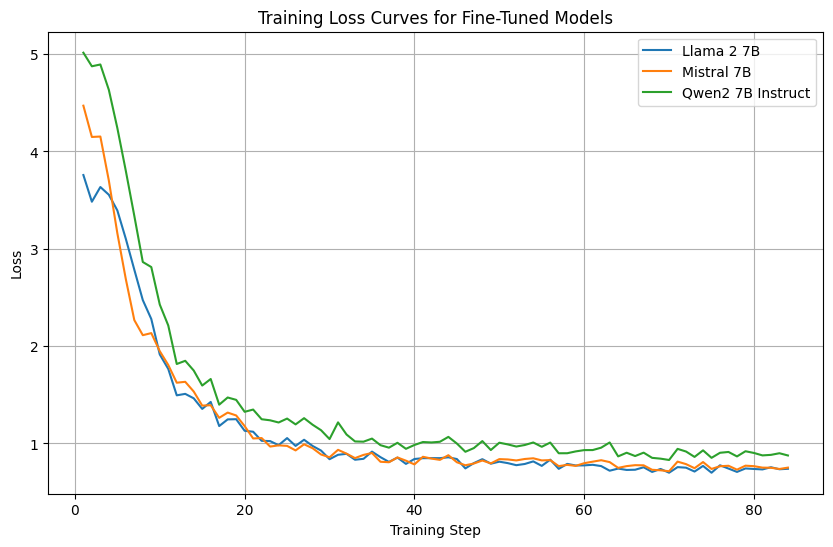

In [19]:
import json
import matplotlib.pyplot as plt

# Paths to experiment logs
log_paths = {
    "Llama 2 7B": "./results/fine-tuning/Llama-2-7b-hf/experiment_log.json",
    "Mistral 7B": "./results/fine-tuning/Mistral-7B-v0-1/experiment_log.json",
    "Qwen2 7B Instruct": "./results/fine-tuning/Qwen2-7B-Instruct/experiment_log.json"
}

loss_curves = {}

for model, path in log_paths.items():
    with open(path, "r") as f:
        log = json.load(f)
    steps = []
    losses = []
    for entry in log["training_history"]:
        if "loss" in entry:
            steps.append(entry["step"])
            losses.append(entry["loss"])
    loss_curves[model] = (steps, losses)

plt.figure(figsize=(10,6))
for model, (steps, losses) in loss_curves.items():
    plt.plot(steps, losses, label=model)
plt.xlabel("Training Step")
plt.ylabel("Loss")
plt.title("Training Loss Curves for Fine-Tuned Models")
plt.legend()
plt.grid(True)
plt.show()

### Training Time Comparison

We compare the total training time (in minutes) for each model to assess fine-tuning efficiency.

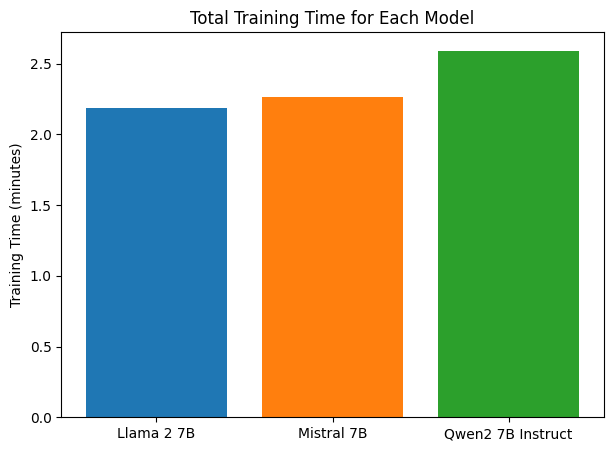

In [20]:
import matplotlib.pyplot as plt
import json

# Paths to experiment summaries
summary_paths = {
    "Llama 2 7B": "./results/fine-tuning/Llama-2-7b-hf/experiment_summary.json",
    "Mistral 7B": "./results/fine-tuning/Mistral-7B-v0-1/experiment_summary.json",
    "Qwen2 7B Instruct": "./results/fine-tuning/Qwen2-7B-Instruct/experiment_summary.json"
}

training_times = {}
for model, path in summary_paths.items():
    with open(path, "r") as f:
        summary = json.load(f)
    training_times[model] = summary["key_metrics"]["training_time_minutes"]

plt.figure(figsize=(7,5))
plt.bar(training_times.keys(), training_times.values(), color=["#1f77b4", "#ff7f0e", "#2ca02c"])
plt.ylabel("Training Time (minutes)")
plt.title("Total Training Time for Each Model")
plt.show()

### Final Training Loss Comparison

We compare the final training loss for each model to assess which model best fit the data during fine-tuning.

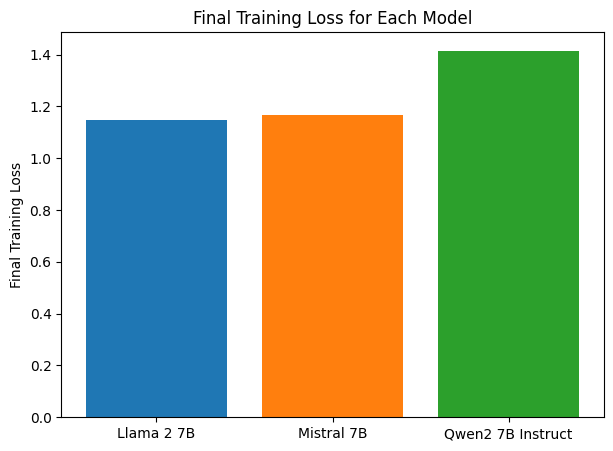

In [21]:
final_losses = {}
for model, path in summary_paths.items():
    with open(path, "r") as f:
        summary = json.load(f)
    final_losses[model] = summary["key_metrics"]["final_train_loss"]

plt.figure(figsize=(7,5))
plt.bar(final_losses.keys(), final_losses.values(), color=["#1f77b4", "#ff7f0e", "#2ca02c"])
plt.ylabel("Final Training Loss")
plt.title("Final Training Loss for Each Model")
plt.show()

## Fine-Tuning Results Summary

The following summarizes the fine-tuning process and key results for each baseline model, as recorded in the experiment logs:

**Llama 2 7B (`meta-llama/Llama-2-7b-hf`)**
- Final training loss: **1.15**
- Training time: **2.19 minutes**
- Training samples: 896, Validation samples: 112
- LoRA rank: 16, Learning rate: 0.0002, Batch size: 8, Epochs: 3

**Mistral 7B (`mistralai/Mistral-7B-v0.1`)**
- Final training loss: **1.17**
- Training time: **2.26 minutes**
- Training samples: 896, Validation samples: 112
- LoRA rank: 16, Learning rate: 0.0002, Batch size: 8, Epochs: 3

**Qwen2 7B Instruct (`Qwen/Qwen2-7B-Instruct`)**
- Final training loss: **1.42**
- Training time: **2.59 minutes**
- Training samples: 896, Validation samples: 112
- LoRA rank: 16, Learning rate: 0.0002, Batch size: 8, Epochs: 3

All models were fine-tuned with the same hyperparameters for a fair comparison. Llama 2 7B and Mistral 7B achieved lower final training loss compared to Qwen2 7B Instruct on this dataset.

**Note:**

All detailed experiment logs, training histories, and summary reports for each model can be found in the `DomainAI/results/fine-tuning/` directory, under the respective model folders. These include per-step loss, evaluation metrics, configuration details, and system information for full reproducibility and further analysis.

**Model Artifacts:**

All fine-tuned model versions and checkpoints are saved in the `DomainAI/fine_tuned_models/` folder, organized by model. Each directory contains the model weights, tokenizer, and all necessary files for loading and using the fine-tuned models.